In [ ]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
seed=4
tf.random.set_seed(4)

In [ ]:
#Load The MNIST data set from keras and Kaagle
data = tf.keras.datasets.mnist

In [ ]:
(X_train, Y_train), (X_test, Y_test) = data.load_data()

In [ ]:
X_train = np.concatenate((X_train, X_test))
y_train = np.concatenate((Y_train, Y_test))
y_train = y_train.astype(int)

In [ ]:
X_train.shape, y_train.shape

((70000, 28, 28), (70000,))

In [ ]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
y_train

array([5, 0, 4, ..., 4, 5, 6])

In [ ]:
len(pd.unique(y_train))

10

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
valid_data = pd.read_csv('/content/drive/MyDrive/Number_Recognition/train.csv')

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/Number_Recognition/test.csv')

In [ ]:
#Data Preprocessing

In [ ]:
y_validation = valid_data['label'].values
x_validation = valid_data.drop('label', axis = 1).values

In [ ]:
x_validation

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y_validation

array([1, 0, 1, ..., 7, 6, 9])

In [ ]:
#Reshaping The data

In [ ]:
x_train = X_train.reshape(X_train.shape[0], 28,28)
x_validation = x_validation.reshape(x_validation.shape[0],28,28)
x_test = test_data.values.reshape(test_data.shape[0], 28,28)

x_train.shape, y_train.shape, x_validation.shape, y_validation.shape,  x_test.shape

((70000, 28, 28), (70000,), (42000, 28, 28), (42000,), (28000, 28, 28))

In [ ]:
#Plot the first sample digit images with their actual label

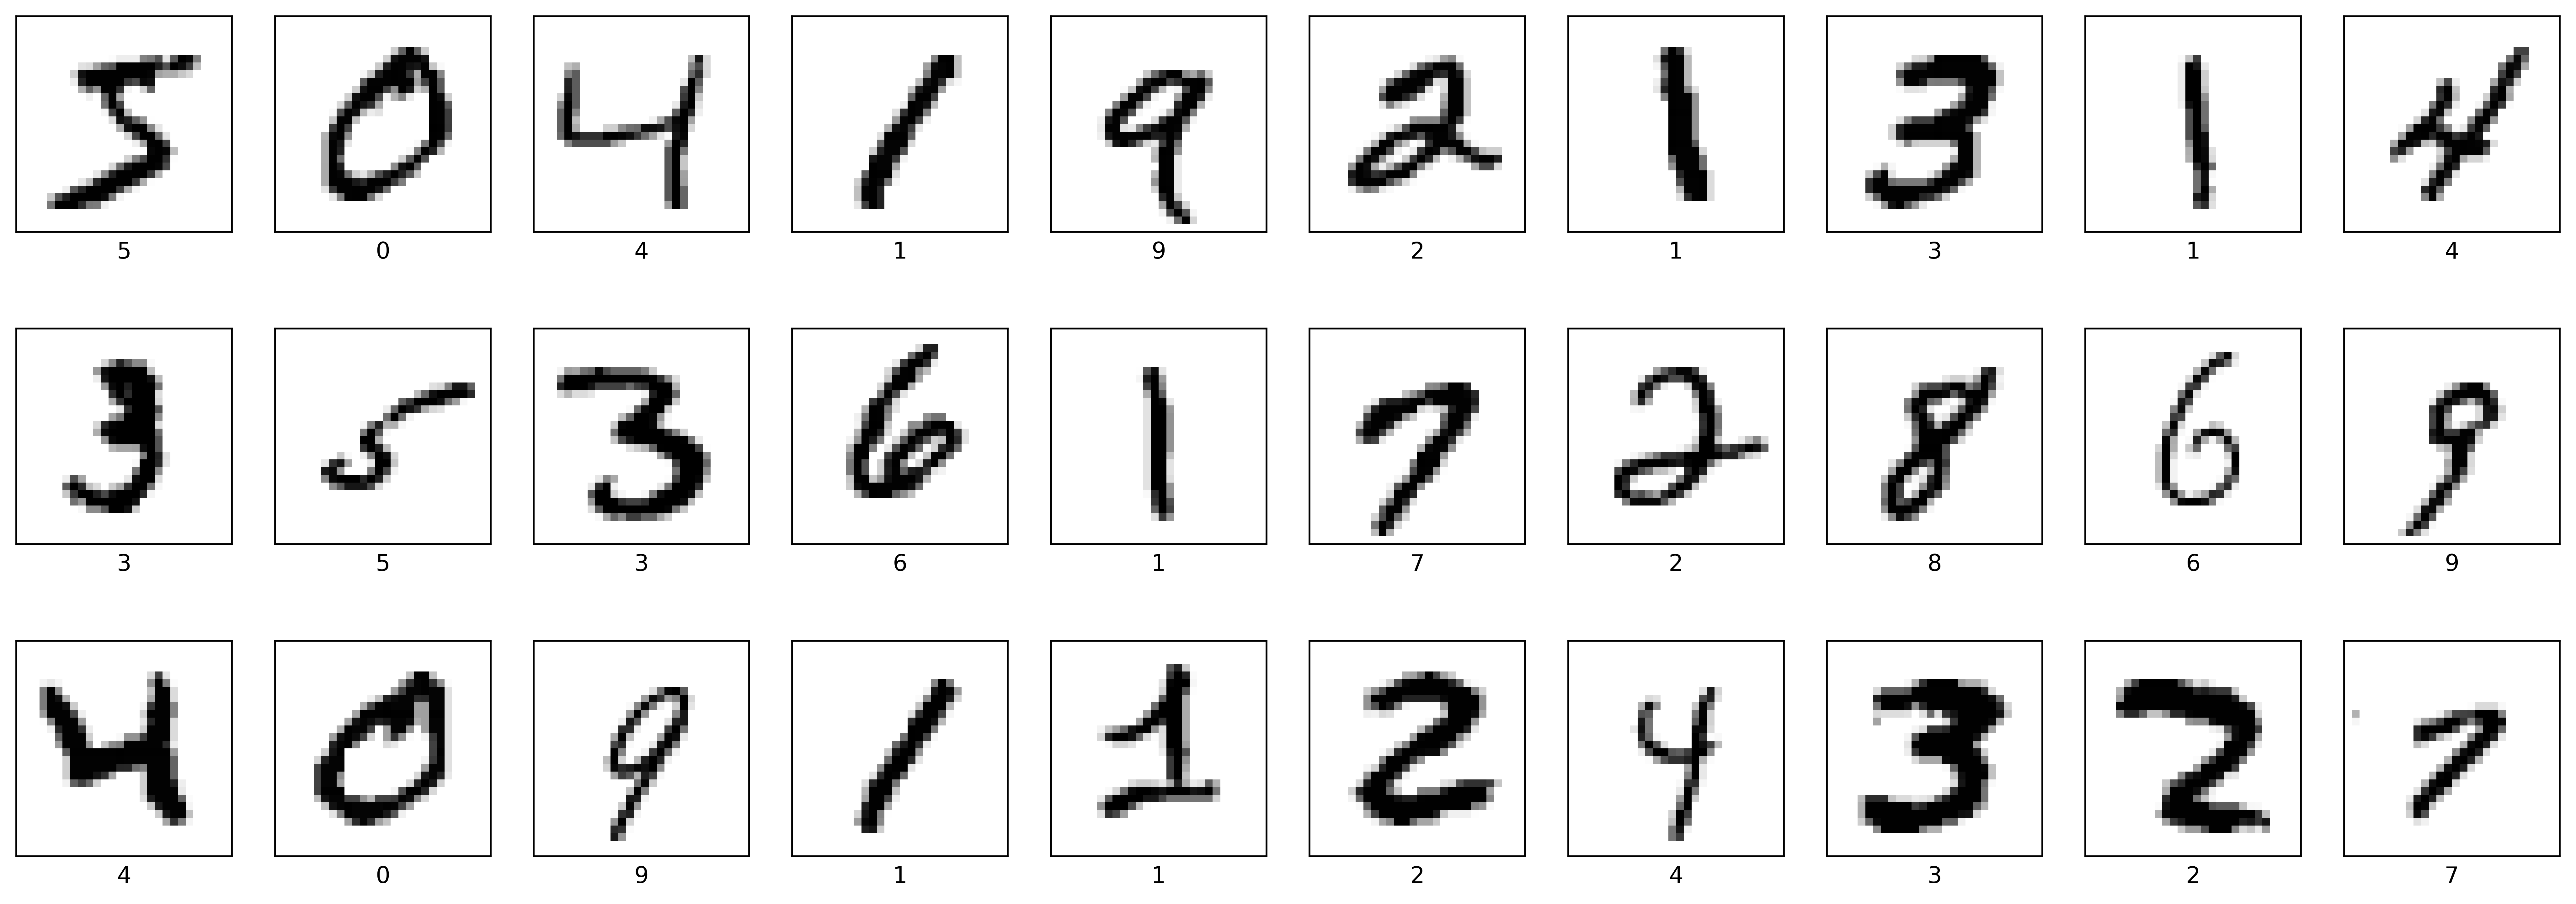

In [ ]:
plt.figure(figsize=(20,7), dpi = 523)
for i in range(30):
    plt.subplot(3,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [ ]:
#Adding Dimension

In [ ]:
x_train = x_train.reshape(-1,28,28,1)
x_valid = x_validation.reshape(-1,28,28,1)
x_test  = x_test.reshape(-1,28,28,1)

print('Train Data shape      :',x_train.shape)
print('Validation Data shape :',x_valid.shape)
print('Test Data shape       :',x_test.shape)

Train Data shape      : (70000, 28, 28, 1)
Validation Data shape : (42000, 28, 28, 1)
Test Data shape       : (28000, 28, 28, 1)


In [ ]:
#Normalization

In [ ]:
x_train, x_valid, x_test = x_train / 255, x_valid / 255, x_test / 255

In [ ]:
#Encoding the labels

In [ ]:
y_train_ = tf.keras.utils.to_categorical(y_train)
y_valid_ = tf.keras.utils.to_categorical(y_validation)

In [ ]:
#Model Implementation

In [ ]:
batch = 100
epochs = 70

steps_per_epoch = x_train.shape[0]//batch
steps_per_epoch

700

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=10,zoom_range=0.15)

image_generator = datagen.flow(x_train, y_train_, batch_size=batch, seed=seed,)

In [ ]:
print('The Unique digits are :', sorted(pd.unique(y_train)))
n = len(pd.unique(y_train))
print('There are total',n, 'unique digits')

The Unique digits are : [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]
There are total 10 unique digits


In [ ]:
model = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu', input_shape = (28,28,1)),         # Convolution Layer with relu
    layers.Conv2D(64, (4, 4), activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),         # Convolution Layer with relu
    layers.Conv2D(64, (4, 4), activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),                                         # MaxPooling layer with relu

    layers.Conv2D(128, (3, 3), activation = 'relu'),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(150, activation = tf.nn.relu),     # Hidden layer 1
    layers.Dense(150, activation = tf.nn.relu),      # Hidden layer2
    layers.Dense(n, activation = tf.nn.softmax)     # Output layer softmax
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 27, 27, 64)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 64)     │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 11, 11, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 8, 8, 64)       │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 2, 2, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 2, 2, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 150)            │        76,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 150)            │        22,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 323,958 (1.24 MB)

 Trainable params: 323,446 (1.23 MB)

 Non-trainable params: 512 (2.00 KB)

In [ ]:
#Visualizing the model

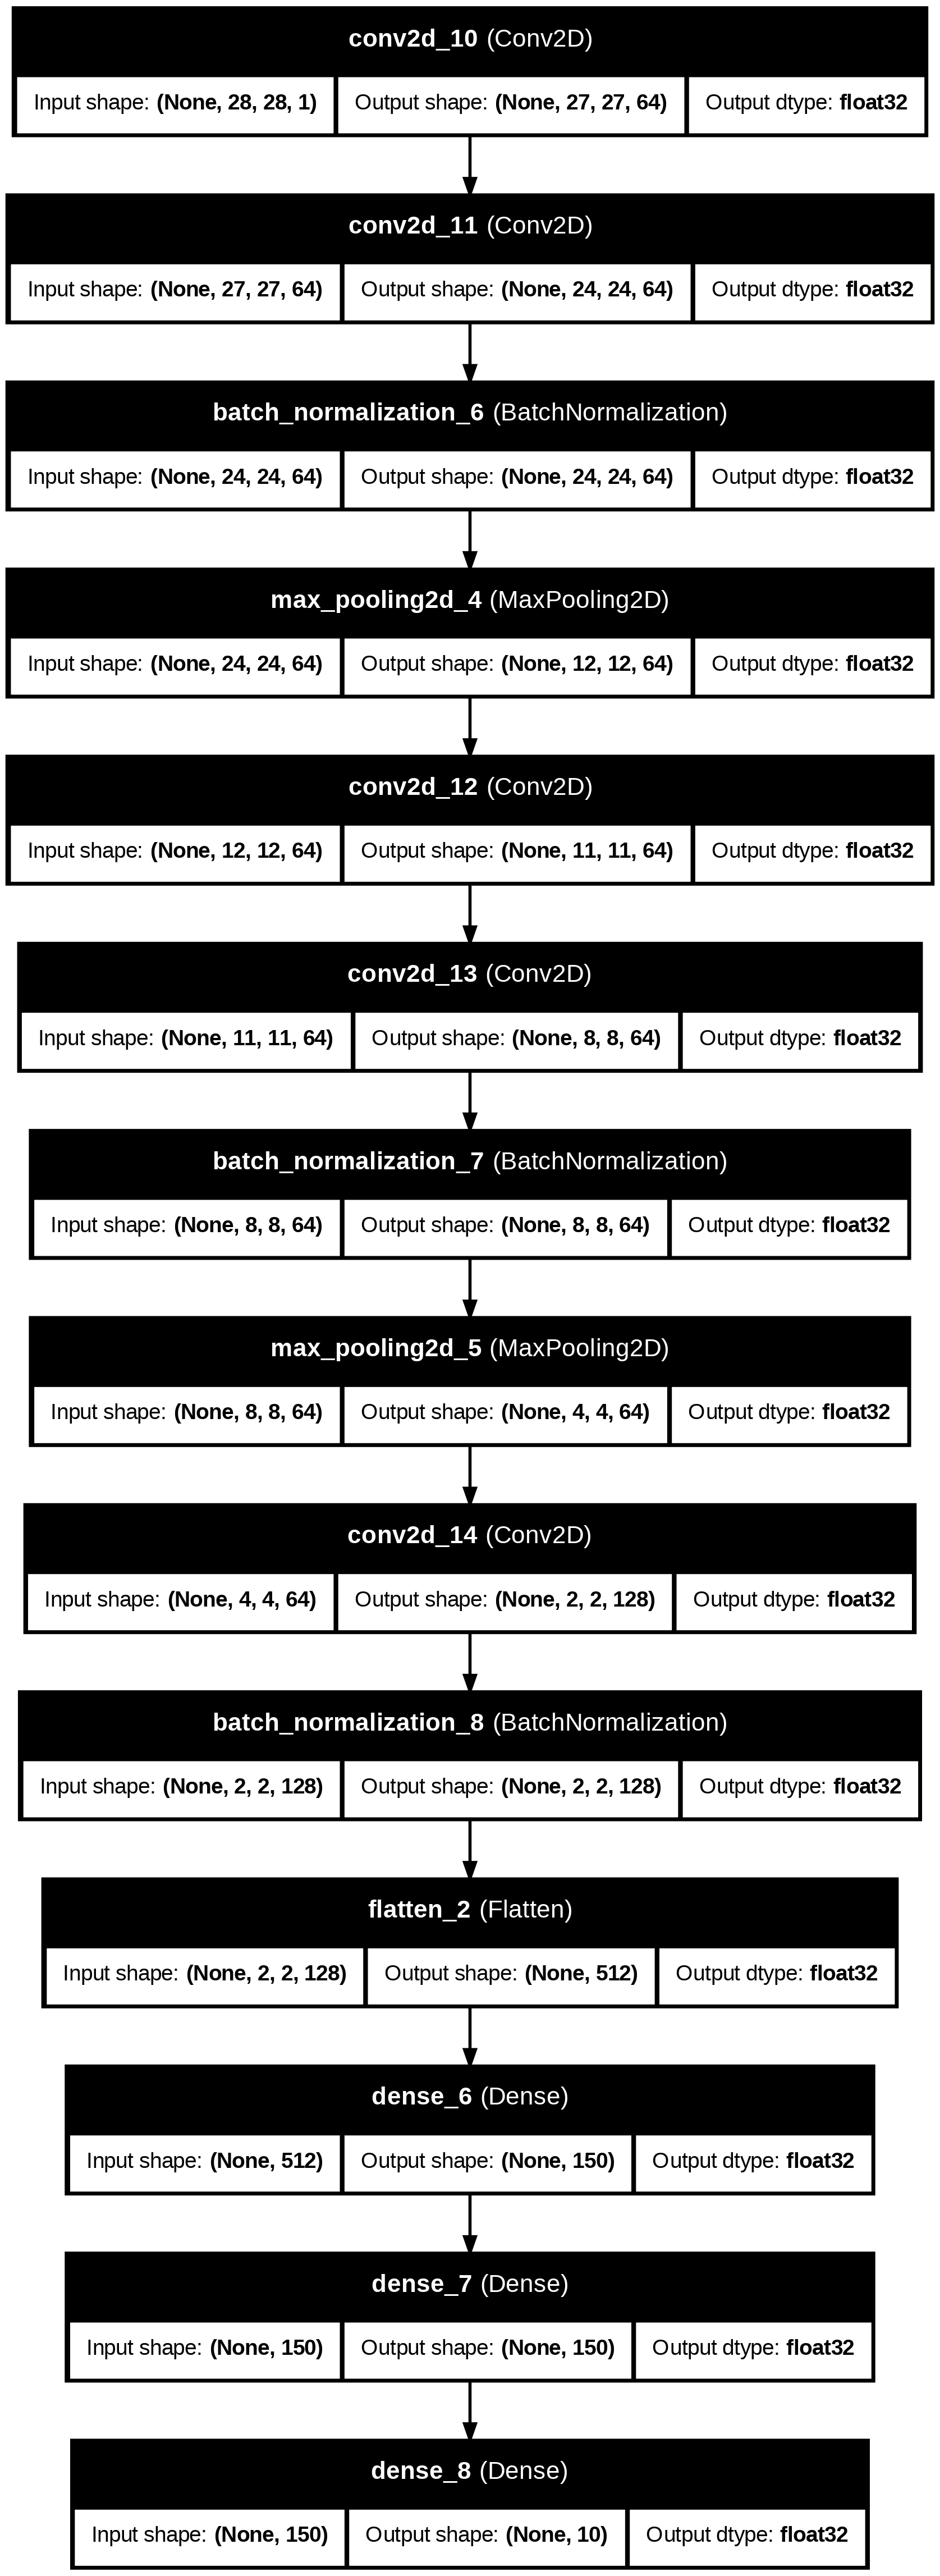

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True, expand_nested=True)

In [ ]:
### .et the learning rate =
lr_rate = 0.0001

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                                  patience = 3,
                                                  min_delta = 1e-4,
                                                  restore_best_weights = True)

In [ ]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = 'saved_model/best_model_todate.weights.h5',
                                                 save_best_only = True,
                                                 save_weights_only = True,
                                                 monitor='val_accuracy',
                                                 mode='max')

In [ ]:
tn = tf.keras.callbacks.TerminateOnNaN()

In [ ]:
scheduler = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate = lr_rate,
                                                           decay_steps = steps_per_epoch//4,
                                                           decay_rate= 0.80,
                                                           staircase=True)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
lr_plateau = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                                  factor = 0.1,
                                                  patience = 4,
                                                  verbose = 3)

In [ ]:
#optimizer and loss function for training

In [ ]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_rate)

In [ ]:
#model compilation

In [ ]:
model.compile(optimizer=optimizer,loss=loss_object, metrics=['accuracy'])

In [ ]:
#Training the model

In [ ]:
history = model.fit(image_generator,
                    epochs=epochs,
                    validation_data=(x_valid, y_valid_),
                    steps_per_epoch=steps_per_epoch,
                    callbacks = [lr_plateau, checkpoint_callback, early_stopping, tn]
                   )

Epoch 1/70


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


700/700 ━━━━━━━━━━━━━━━━━━━━ 810s 1s/step - accuracy: 0.8471 - loss: 0.5300 - val_accuracy: 0.9856 - val_loss: 0.0545 - learning_rate: 1.0000e-04
Epoch 2/70
700/700 ━━━━━━━━━━━━━━━━━━━━ 774s 1s/step - accuracy: 0.9829 - loss: 0.0567 - val_accuracy: 0.9885 - val_loss: 0.0363 - learning_rate: 1.0000e-04
Epoch 3/70
700/700 ━━━━━━━━━━━━━━━━━━━━ 800s 1s/step - accuracy: 0.9876 - loss: 0.0380 - val_accuracy: 0.9890 - val_loss: 0.0349 - learning_rate: 1.0000e-04
Epoch 4/70
700/700 ━━━━━━━━━━━━━━━━━━━━ 766s 1s/step - accuracy: 0.9903 - loss: 0.0312 - val_accuracy: 0.9925 - val_loss: 0.0242 - learning_rate: 1.0000e-04
Epoch 5/70
700/700 ━━━━━━━━━━━━━━━━━━━━ 790s 1s/step - accuracy: 0.9918 - loss: 0.0258 - val_accuracy: 0.9950 - val_loss: 0.0164 - learning_rate: 1.0000e-04
Epoch 6/70
700/700 ━━━━━━━━━━━━━━━━━━━━ 750s 1s/step - accuracy: 0.9933 - loss: 0.0212 - val_accuracy: 0.9947 - val_loss: 0.0170 - learning_rate: 1.0000e-04
Epoch 7/70
700/700 ━━━━━━━━━━━━━━━━━━━━ 756s 1s/step - accuracy: 0.99

In [ ]:
#Model Evaluation

In [ ]:
loss, accuracy = model.evaluate(x_valid, y_valid_)
print('The accuracy of model on unknown data is',round((accuracy*100),4),'%')

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 89s 68ms/step - accuracy: 0.9997 - loss: 0.0016
The accuracy of model on unknown data is 99.9643 %


In [ ]:
history_dict = history.history
history_dict.keys()

In [ ]:
#Training Accuracy annd Loss

In [ ]:
acc = history_dict['accuracy']
acc

[0.9366428852081299,
 0.9838857054710388,
 0.9881428480148315,
 0.9905571341514587,
 0.9915428757667542,
 0.9931142926216125,
 0.9936857223510742,
 0.99461430311203,
 0.9955714344978333,
 0.9958571195602417,
 0.9956142902374268,
 0.9966285824775696,
 0.99657142162323,
 0.9966285824775696,
 0.9980714321136475,
 0.9983000159263611,
 0.9988856911659241,
 0.9987428784370422,
 0.9988571405410767,
 0.9988856911659241,
 0.9989285469055176]

In [ ]:
loss = history_dict['loss']
loss

[0.226291224360466,
 0.05212169513106346,
 0.03664218261837959,
 0.03048730455338955,
 0.0263826921582222,
 0.022036921232938766,
 0.01933050900697708,
 0.017063824459910393,
 0.014596994034945965,
 0.01340179331600666,
 0.013168692588806152,
 0.011039993725717068,
 0.011122185736894608,
 0.009716118685901165,
 0.006232285872101784,
 0.005517277866601944,
 0.004433563910424709,
 0.004009036812931299,
 0.004146055784076452,
 0.0040731485933065414,
 0.003827853826805949]

In [ ]:
#Validation Accuracy and Loss

In [ ]:
val_acc = history_dict['val_accuracy']
val_acc

[0.985619068145752,
 0.9885237812995911,
 0.9890238046646118,
 0.9924761652946472,
 0.9950000047683716,
 0.9947142601013184,
 0.9952142834663391,
 0.9948809742927551,
 0.9965476393699646,
 0.9978809356689453,
 0.9979285597801208,
 0.9959285855293274,
 0.998119056224823,
 0.9976190328598022,
 0.9993809461593628,
 0.9994761943817139,
 0.9994999766349792,
 0.9996428489685059,
 0.9996190667152405,
 0.9995714426040649,
 0.9996428489685059]

In [ ]:
val_loss = history_dict['val_loss']
val_loss

[0.05451865866780281,
 0.03631636127829552,
 0.03489154949784279,
 0.024203389883041382,
 0.016413958743214607,
 0.01695641130208969,
 0.016216080635786057,
 0.016479991376399994,
 0.010088155046105385,
 0.00664427038282156,
 0.007017846219241619,
 0.012018013745546341,
 0.006631695665419102,
 0.007424189243465662,
 0.0026772087439894676,
 0.0023134497459977865,
 0.0019836481660604477,
 0.00173494394402951,
 0.0018393080681562424,
 0.0017789631383493543,
 0.001532368827611208]

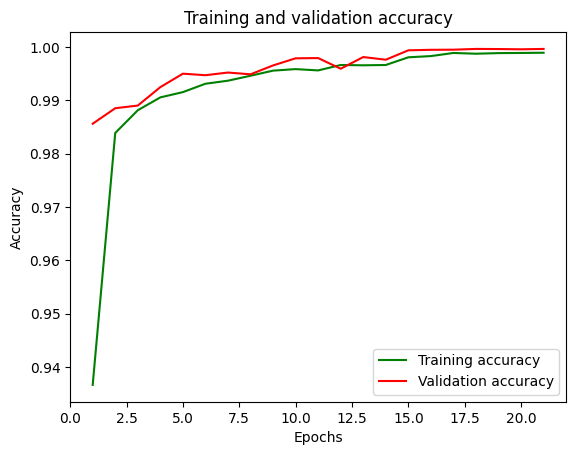

In [ ]:
epochs = np.arange(1, len(acc) + 1)
plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

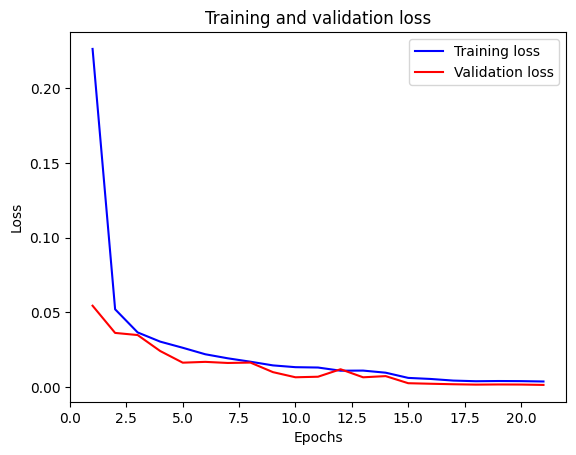

In [ ]:
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#Generating the predictions on Validation Set

In [ ]:
y_predicted = model.predict(x_valid)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
print('Predicted Label :',y_predicted_labels[:10])
print('Actual Label    :',y_validation[:10])

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 83s 63ms/step
Predicted Label : [np.int64(1), np.int64(0), np.int64(1), np.int64(4), np.int64(0), np.int64(0), np.int64(7), np.int64(3), np.int64(5), np.int64(3)]
Actual Label    : [1 0 1 4 0 0 7 3 5 3]


In [ ]:
cm = tf.math.confusion_matrix(labels = y_validation, predictions=y_predicted_labels)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
print("Classification Report: \n", classification_report(y_validation, y_predicted_labels))

In [ ]:
#Validating the predictions

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("Pred: {} ({:2.0f}%) \n Truth : {}".format(predicted_label, (100*np.max(predictions_array)),
                                                          true_label), color=color)

In [ ]:
def plot_value_array(i, predictions_array, true_labels):
    true_label = true_labels[i]
    plt.grid(False)
    plt.xticks(range(10))

    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)


    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

In [ ]:
# for 25 images
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows), dpi = 523)
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, y_predicted[i], y_validation, x_valid)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, y_predicted[i], y_validation)
plt.tight_layout()
plt.show()

In [ ]:
#Inaccurate Predictions

In [ ]:
count = 0
wrong_predictions = []
for i in range(len(y_validation)):
    predicted_label = np.argmax(y_predicted[i])
    if predicted_label != y_validation[i]:
        count +=1
        wrong_predictions.append(i)
print('There are',count,'wrong predictions in Validation datasets')
print('Wrong predicted indices :\n',wrong_predictions)

IndexError: list index out of range

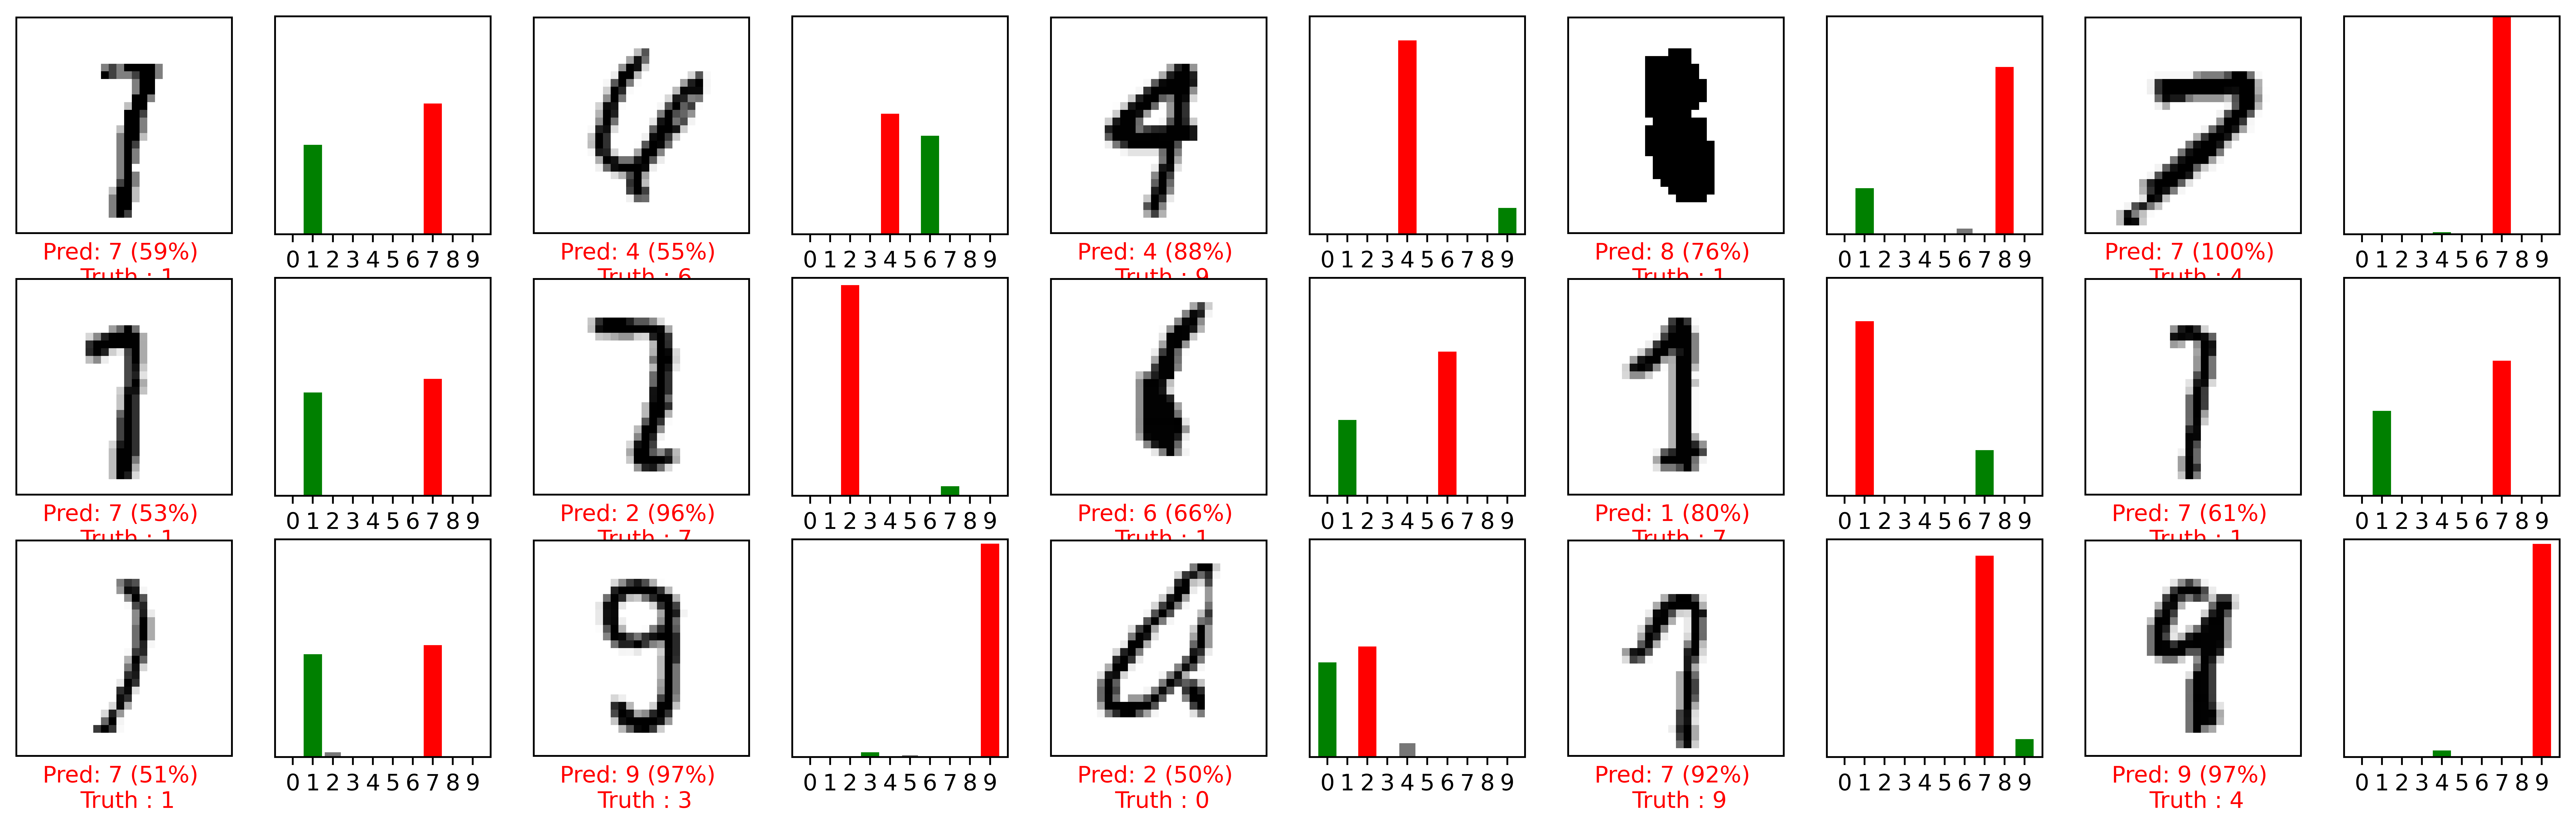

In [ ]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows), dpi = 723)

for ix in range(num_images):
    i = wrong_predictions[ix]
    plt.subplot(num_rows, 2*num_cols, 2*ix+1)
    plot_image(i, y_predicted[i], y_validation, x_valid)
    plt.subplot(num_rows, 2*num_cols, 2*ix+2)
    plot_value_array(i, y_predicted[i], y_validation)
plt.tight_layout()
plt.show()

In [ ]:
#Generating Predictions for Test data set

In [ ]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
print('Predicted Label :',y_predicted_labels[:10])
print('Actual Label    :',Y_test[:10])

313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 119ms/step
Predicted Label : [np.int64(7), np.int64(2), np.int64(2), np.int64(0), np.int64(4), np.int64(2), np.int64(4), np.int64(9), np.int64(5), np.int64(9)]
Actual Label    : [7 2 1 0 4 1 4 9 5 9]


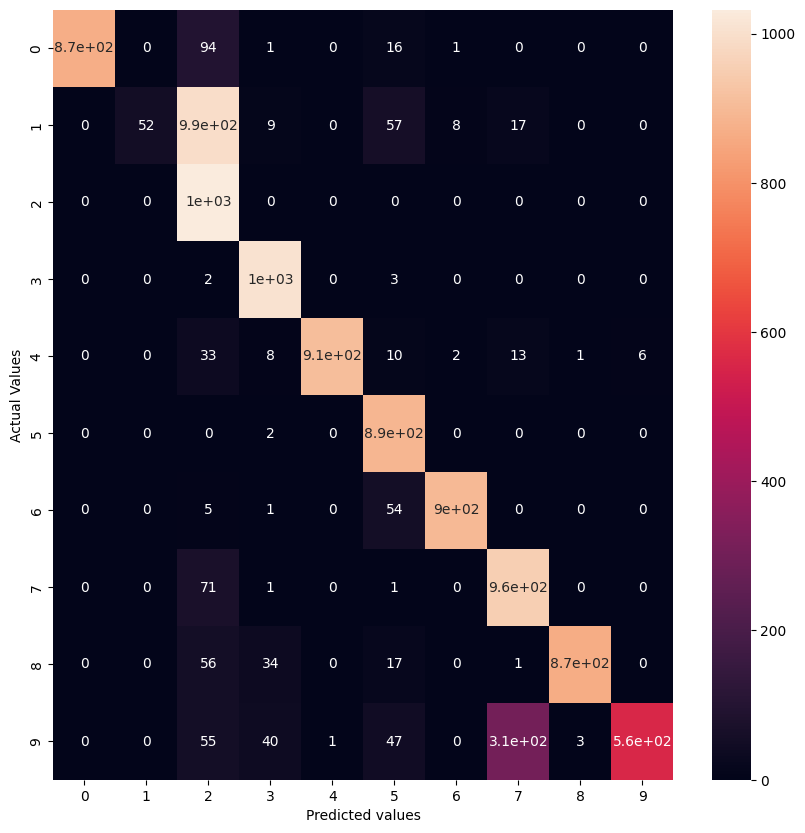

In [ ]:
cm = tf.math.confusion_matrix(labels = Y_test, predictions=y_predicted_labels)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
print("Classification Report: \n", classification_report(Y_test, y_predicted_labels)) ## 95%accuracy

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.89      0.94       980
           1       1.00      0.05      0.09      1135
           2       0.44      1.00      0.61      1032
           3       0.91      1.00      0.95      1010
           4       1.00      0.93      0.96       982
           5       0.81      1.00      0.90       892
           6       0.99      0.94      0.96       958
           7       0.74      0.93      0.82      1028
           8       1.00      0.89      0.94       974
           9       0.99      0.55      0.71      1009

    accuracy                           0.80     10000
   macro avg       0.89      0.82      0.79     10000
weighted avg       0.89      0.80      0.78     10000



In [ ]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows), dpi = 523)
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, y_predicted[i], Y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, y_predicted[i], Y_test)
plt.tight_layout()
plt.show()

In [ ]:
#Inaccurate Predictions

In [ ]:
count = 0
wrong_predictions = []
for i in range(len(Y_test)):
    predicted_label = np.argmax(y_predicted[i])
    if predicted_label != Y_test[i]:
        count +=1
        wrong_predictions.append(i)
print('There are',count,'wrong predictions in test datasets')
print('Wrong predicted indices :\n',wrong_predictions)

There are 1968 wrong predictions in test datasets
Wrong predicted indices :
 [2, 5, 12, 14, 20, 29, 31, 37, 39, 40, 46, 57, 58, 62, 74, 78, 89, 92, 94, 96, 104, 107, 108, 135, 137, 143, 145, 154, 168, 175, 176, 178, 180, 189, 190, 191, 193, 196, 202, 203, 204, 209, 214, 215, 217, 224, 228, 235, 239, 241, 247, 251, 252, 264, 265, 266, 272, 276, 279, 288, 290, 292, 300, 302, 314, 320, 324, 325, 329, 330, 332, 342, 345, 348, 350, 354, 357, 377, 378, 385, 388, 389, 391, 393, 394, 409, 411, 416, 417, 419, 426, 427, 430, 439, 443, 447, 448, 455, 468, 471, 473, 476, 480, 487, 489, 495, 498, 504, 506, 508, 523, 537, 543, 545, 551, 552, 558, 575, 582, 584, 591, 593, 615, 619, 625, 647, 650, 652, 667, 672, 673, 674, 675, 682, 688, 691, 695, 696, 700, 701, 707, 716, 725, 735, 745, 749, 754, 755, 761, 762, 767, 769, 772, 777, 783, 788, 790, 798, 809, 813, 818, 824, 826, 829, 831, 833, 835, 836, 839, 840, 842, 848, 850, 862, 870, 882, 883, 889, 896, 900, 902, 906, 907, 918, 920, 929, 936, 947, 948,

In [ ]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows), dpi = 723)

for ix in range(num_images):
    i = wrong_predictions[ix]
    plt.subplot(num_rows, 2*num_cols, 2*ix+1)
    plot_image(i, y_predicted[i], Y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*ix+2)
    plot_value_array(i, y_predicted[i], Y_test)
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 89ms/step


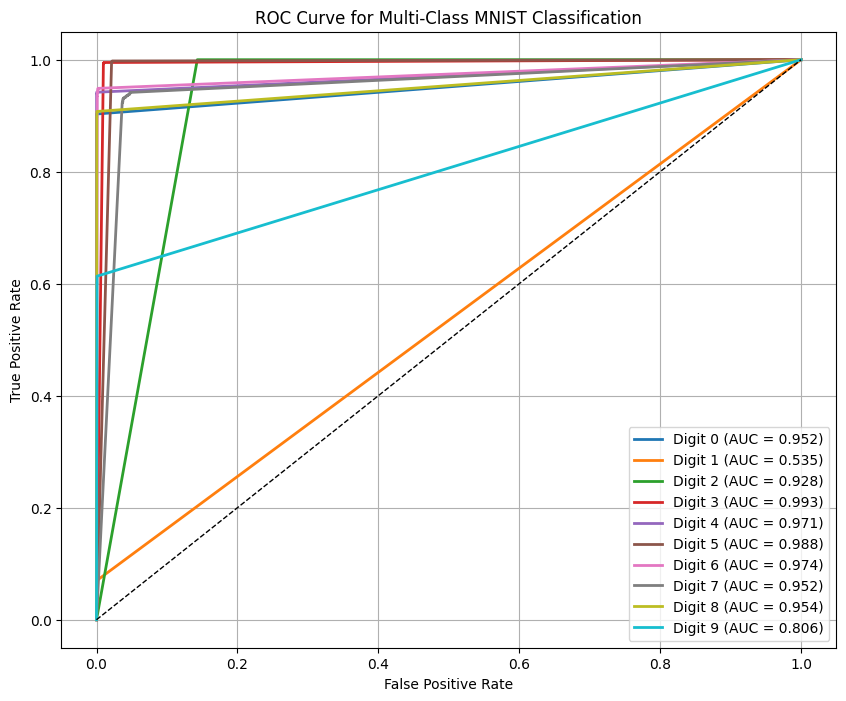

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(Y_test, classes=list(range(10)))
n_classes = y_test_bin.shape[1]
y_score = model.predict(X_test)
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f"Digit {i} (AUC = {roc_auc:.3f})")

# Diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=1)

plt.title("ROC Curve for Multi-Class MNIST Classification")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()